# Opertura d'una nova oficina i predicció de potencials localitzacions futures
 

|   INTEGRANTS                    | Arnau Muñoz Barrera     | Míriam López Sánchez       | Luis Martínez Zamora       | Marc Rodríguez Vitolo
| -------------------------- | ----------------------- | -------------------------- | -------------------------- | --------------------------

### 1. Objectius

L'objectiu d'aquest projecte es centra en buscar ubicacions idònies per obrir noves oficines de la Caixa d'Enginyers, valorant tant la possiblitat d'oficines fixes com oficinse mòbils que arriben a una determinada zona. A més, es desenvoluparà també un model predictiu amb l'ajuda d'IA que permeti identificar potencials localitzacions futures.

### 2. Font de les dades

Com a dades per analitzar en aquest projecte s'han agafat conjunts de dades extrets de fonts oficials: INE, BdE.

### 3. Metodologia seguida

- Recerca de dades
- Anàlisi de dades amb python (realització de gràfiques i extracció d'estadístiques)
- Interpretació de resultats
- Elecció de les millors ubicacions posibles
- Entrenament del model predictiu
- Test del model predictiu
- Extracció de conclusions


### 4. Anàlisi de les dades
##### 1. EDA (exploratory data analysis)
Com a primer pas, caldrà que importem totes les llibreries i utilitats que farem servir en el desenvolupament de la pràctica:


In [1]:
# Import libraries 

%pip install pandas seaborn scikit-learn category_encoders scikit-optimize scipy openpyxl geopandas mapclassify openpyxl unidecode

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import gist_heat_r
import pandas as pd
import seaborn as sns
import geopandas as gpd

import warnings
warnings.simplefilter(action='ignore')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\arnau\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


A continuació, farem la importació dels datasets (arxius d'extensió **.xlsx**) a analitzar i els analitzarem breument:

Estructura Interna de dataframe_bancs_per_provincia:  (52, 5)
  Provincia   Banco de España   Oficinas en España  Entidades de depósito   \
0      Álava               NaN                 147                     147   
1   Albacete               NaN                 211                     211   
2    Alacant               1.0                 603                     601   
3    Almería               NaN                 286                     285   
4   Asturias               1.0                 452                     449   

   Otras entidades de crédito y EFC   
0                                NaN  
1                                NaN  
2                                2.0  
3                                1.0  
4                                3.0  


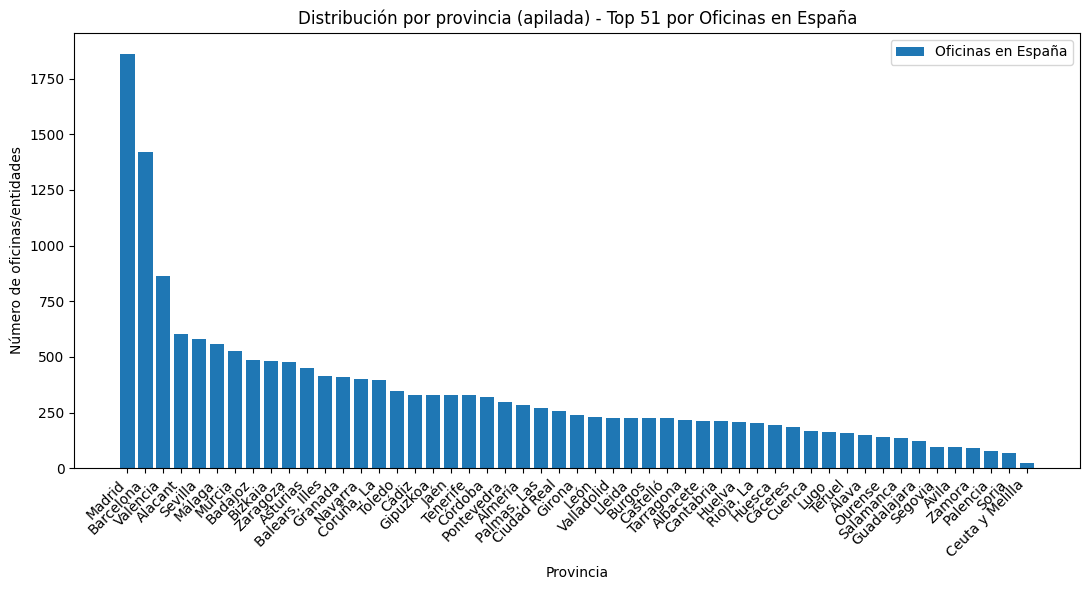

In [ ]:
dataframe_bancs_per_provincia = pd.read_excel('data/Bancs per provincia.xlsx', sheet_name=0, header=1, engine='openpyxl')
print("Estructura Interna de dataframe_bancs_per_provincia: ", dataframe_bancs_per_provincia.shape)

# View complete dataframe with print(dataframe_bancs_per_provincia)
print(dataframe_bancs_per_provincia.head(5))

prov_col = 'Provincia'

num_cols = [
    'Oficinas en España',
]

dataframe_bancs_per_provincia.columns = dataframe_bancs_per_provincia.columns.str.strip()

df = dataframe_bancs_per_provincia.copy()
df[prov_col] = df[prov_col].astype(str).str.strip()

df = df[df[prov_col].str.upper() != 'TOTAL NACIONAL']

df['Oficinas en España'] = pd.to_numeric(df['Oficinas en España'], errors='coerce')

col_valor = 'Oficinas en España'
serie = (
    df.groupby(prov_col, dropna=False)[col_valor]
      .sum()
      .sort_values(ascending=False)
)

top_n = 51
serie_plot = serie.head(top_n)

df_stacked = df[[prov_col, col_valor]].groupby(prov_col, dropna=False).sum()
orden = df_stacked.sort_values(col_valor, ascending=False).head(top_n)

plt.figure(figsize=(11, 6))
bottom = np.zeros(len(orden))
for c in num_cols:
    plt.bar(orden.index.astype(str), orden[c].values, bottom=bottom, label=c)
    bottom += orden[c].values

plt.title(f"Distribució per provincia  - {top_n} Provincies per Oficinas en España")
plt.xlabel(prov_col)
plt.ylabel("Nombre d'oficines/entitats")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
dataframe_empresa_per_mida_and_provincia = pd.read_excel('data/Empresa per mida y provincia 2008-2022.xlsx', sheet_name=0, header=0, engine='openpyxl')
print("Estructura Interna de dataframe_empresa_per_mida_and_provincia: ", dataframe_empresa_per_mida_and_provincia.shape)

print(dataframe_empresa_per_mida_and_provincia.head(5))

Estructura Interna de dataframe_empresa_per_mida_and_provincia:  (72, 31)
   Unnamed: 0       CCAA Provincias  2009 Total      2009  2010 Total  \
0         NaN  Andalucía    Almería       42535  0.085366       41548   
1         NaN  Andalucía      Cádiz       61021  0.122467       60125   
2         NaN  Andalucía    Córdoba       48222  0.096780       47422   
3         NaN  Andalucía    Granada       58317  0.117040       57618   
4         NaN  Andalucía     Huelva       26263  0.052709       25795   

       2010  2011 Total      2011  2012 Total  ...  2018 Total      2018  \
0  0.084446       40995  0.085065       40516  ...       43406  0.083709   
1  0.122204       58960  0.122342       57288  ...       61786  0.119156   
2  0.096385       46553  0.096598       45278  ...       47874  0.092326   
3  0.117109       56209  0.116634       55183  ...       60020  0.115750   
4  0.052428       24981  0.051836       24168  ...       25236  0.048668   

   2019 Total      2019  2020 

In [4]:
dataframe_variacio_PIB_per_capita = pd.read_excel('data/Variació PIB per capita.xlsx', sheet_name=0, header=0, engine='openpyxl')
print("Estructura Interna de dataframe_variacio_PIB_per_capita: ", dataframe_variacio_PIB_per_capita.shape)

print(dataframe_variacio_PIB_per_capita.head(5))


Estructura Interna de dataframe_variacio_PIB_per_capita:  (62, 15)
         AÑO   2009   2010   2011   2012   2013   2014   2015   2016   2017  \
0  ANDALUCÍA  17685  17567  17299  16597  16381  16600  17458  17865  18691   
1    Almería  19151  18616  17294  17031  16759  17515  18724  20196  21467   
2      Cádiz  16899  17054  16881  16196  15843  15703  16255  16784  17584   
3    Córdoba  16816  16641  16403  15479  15710  15846  16862  17197  17967   
4    Granada  16639  16431  16347  15971  15877  16429  17320  17368  17846   

    2018   2019   2020   2021   2022  
0  19291  19744  17772  19591  21532  
1  21567  22268  20335  20292  22078  
2  18079  18767  16418  18313  20520  
3  18275  18225  16851  18710  20022  
4  18353  19091  17310  18776  20623  


In [5]:
dataframe_variacio_PIB_percentatge = pd.read_excel('data/Variació PIB porcentaje.xlsx', sheet_name=0, header=0, engine='openpyxl')
print("Estructura Interna de dataframe_variacio_PIB_percentatge: ", dataframe_variacio_PIB_percentatge.shape)

print(dataframe_variacio_PIB_percentatge.head(5))

Estructura Interna de dataframe_variacio_PIB_percentatge:  (63, 15)
         AÑO      2009      2010      2011      2012      2013      2014  \
0  ANDALUCÍA -0.042334  0.000354 -0.009320 -0.037661 -0.012646  0.013410   
1    Almería -0.073423 -0.017927 -0.066082 -0.011342 -0.014347  0.045880   
2      Cádiz -0.060030  0.016432 -0.003580 -0.038539 -0.021253 -0.009186   
3    Córdoba -0.036448 -0.007537 -0.012704 -0.057629  0.011554  0.004983   
4    Granada -0.042923 -0.006667 -0.001451 -0.022298 -0.007408  0.032176   

       2015      2016      2017      2018      2019      2020      2021  \
0  0.052258  0.023877  0.045947  0.032558  0.028317 -0.096263  0.105305   
1  0.076989  0.087118  0.068638  0.008094  0.047211 -0.077435  0.006557   
2  0.034527  0.032223  0.046976  0.027549  0.039619 -0.123122  0.117175   
3  0.059463  0.015954  0.040222  0.012709 -0.003859 -0.077453  0.104886   
4  0.052094  0.001488  0.026819  0.029684  0.044019 -0.089531  0.087010   

       2022  
0  0.10676

In [6]:
dataframe_variacio_PIB = pd.read_excel('data/Variació PIB.xlsx', sheet_name=0, header=0, engine='openpyxl')
print("Estructura Interna de dataframe_variacio_PIB_percentatge: ", dataframe_variacio_PIB_percentatge.shape)

print(dataframe_variacio_PIB_percentatge.head(5))

Estructura Interna de dataframe_variacio_PIB_percentatge:  (63, 15)
         AÑO      2009      2010      2011      2012      2013      2014  \
0  ANDALUCÍA -0.042334  0.000354 -0.009320 -0.037661 -0.012646  0.013410   
1    Almería -0.073423 -0.017927 -0.066082 -0.011342 -0.014347  0.045880   
2      Cádiz -0.060030  0.016432 -0.003580 -0.038539 -0.021253 -0.009186   
3    Córdoba -0.036448 -0.007537 -0.012704 -0.057629  0.011554  0.004983   
4    Granada -0.042923 -0.006667 -0.001451 -0.022298 -0.007408  0.032176   

       2015      2016      2017      2018      2019      2020      2021  \
0  0.052258  0.023877  0.045947  0.032558  0.028317 -0.096263  0.105305   
1  0.076989  0.087118  0.068638  0.008094  0.047211 -0.077435  0.006557   
2  0.034527  0.032223  0.046976  0.027549  0.039619 -0.123122  0.117175   
3  0.059463  0.015954  0.040222  0.012709 -0.003859 -0.077453  0.104886   
4  0.052094  0.001488  0.026819  0.029684  0.044019 -0.089531  0.087010   

       2022  
0  0.10676